In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import TimeSeriesSplit

# local
from acquire import get_superstore, get_german_power
import prepare as p

# Explore Exercises

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the german power dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

## Superstore data

In [2]:
ss = get_superstore()
ss = p.prep_superstore(ss)
ss.head()

,item,sale_amount,sale_id,store,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,month,month_name,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,1,January,Tuesday,10.92
2013-01-01,17,26.0,295813,3,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,January,Tuesday,30.16
2013-01-01,7,32.0,125995,10,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231,1,January,Tuesday,308.48
2013-01-01,18,45.0,314073,3,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,January,Tuesday,197.55
2013-01-01,19,34.0,332333,3,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,1,January,Tuesday,25.16


In [3]:
ss = ss.drop(columns=['item_id','item_upc12','item_upc14','store_address','store_city','store_id','store_state','store_zipcode'])
ss.head()

,item,sale_amount,sale_id,store,item_brand,item_name,item_price,month,month_name,day_of_week,sales_total
sale_date,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,1,January,Tuesday,10.92
2013-01-01,17,26.0,295813,3,Ducal,Ducal Refried Red Beans,1.16,1,January,Tuesday,30.16
2013-01-01,7,32.0,125995,10,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,1,January,Tuesday,308.48
2013-01-01,18,45.0,314073,3,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,1,January,Tuesday,197.55
2013-01-01,19,34.0,332333,3,Careone,Careone Family Comb Set - 8 Ct,0.74,1,January,Tuesday,25.16


In [4]:
ss.reset_index().describe(datetime_is_numeric=True)

,sale_date,item,sale_amount,sale_id,store,item_price,month,sales_total
count,913000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000,913000.000000
mean,2015-07-02 12:00:00.000000256,25.500000,52.250287,456500.500000,5.500000,5.160400,6.523549,280.898866
min,2013-01-01 00:00:00,1.000000,0.000000,1.000000,1.000000,0.600000,1.000000,0.000000
25%,2014-04-02 00:00:00,13.000000,30.000000,228250.750000,3.000000,2.970000,4.000000,98.010000
50%,2015-07-02 12:00:00,25.500000,47.000000,456500.500000,5.500000,5.195000,7.000000,233.280000
75%,2016-10-01 00:00:00,38.000000,70.000000,684750.250000,8.000000,7.520000,10.000000,402.780000
max,2017-12-31 00:00:00,50.000000,231.000000,913000.000000,10.000000,9.640000,12.000000,2104.410000
std,NaN,14.430878,28.801144,263560.542223,2.872283,2.737764,3.448535,227.686575


In [5]:
tss = TimeSeriesSplit()
for train_index,test_index in tss.split(ss):
    train,test = ss.iloc[train_index],ss.iloc[test_index]
train.reset_index().describe(datetime_is_numeric=True)

,sale_date,item,sale_amount,sale_id,store,item_price,month,sales_total
count,760834,760834.000000,760834.000000,760834.000000,760834.000000,760834.000000,760834.000000,760834.000000
mean,2015-01-31 08:01:03.896198144,25.499937,50.276052,456347.232474,5.500028,5.160453,6.323327,270.299974
min,2013-01-01 00:00:00,1.000000,0.000000,1.000000,1.000000,0.600000,1.000000,0.000000
25%,2014-01-16 00:00:00,13.000000,29.000000,228022.250000,3.000000,2.970000,3.000000,94.870000
50%,2015-01-31 00:00:00,25.500000,45.000000,456348.500000,6.000000,5.200000,6.000000,224.800000
75%,2016-02-16 00:00:00,38.000000,67.000000,684444.750000,8.000000,7.520000,9.000000,387.200000
max,2017-03-02 00:00:00,50.000000,214.000000,912695.000000,10.000000,9.640000,12.000000,1903.990000
std,NaN,14.430941,27.653162,263561.613796,2.872273,2.737743,3.520083,218.835624


<AxesSubplot:xlabel='sale_date'>

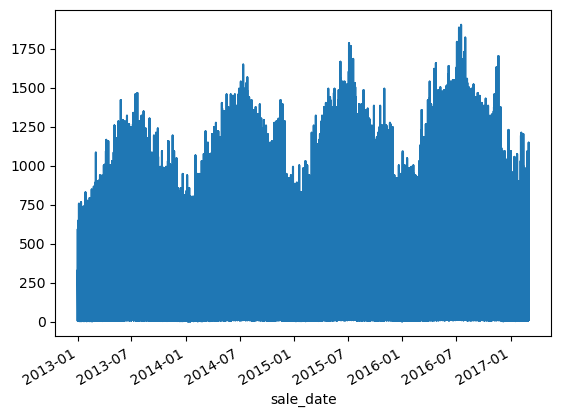

In [6]:
train.sales_total.plot()

<AxesSubplot:xlabel='sale_date'>

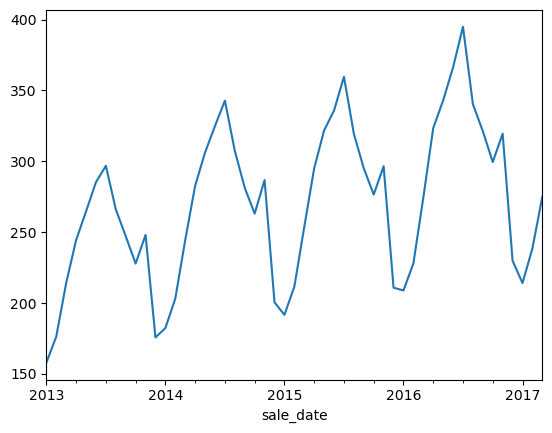

In [7]:
train.resample('M').sales_total.mean().plot()

<AxesSubplot:xlabel='sale_date'>

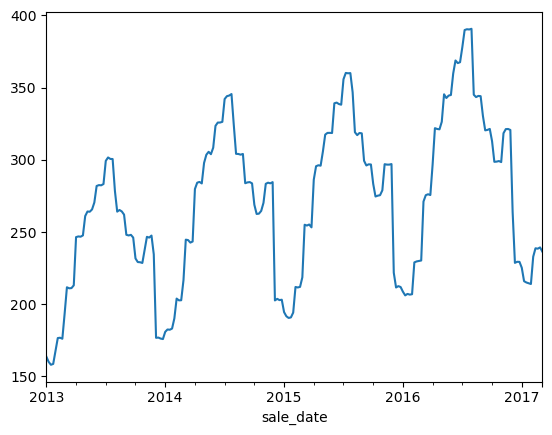

In [8]:
train.resample('W').sales_total.mean().plot()

<AxesSubplot:xlabel='sale_date'>

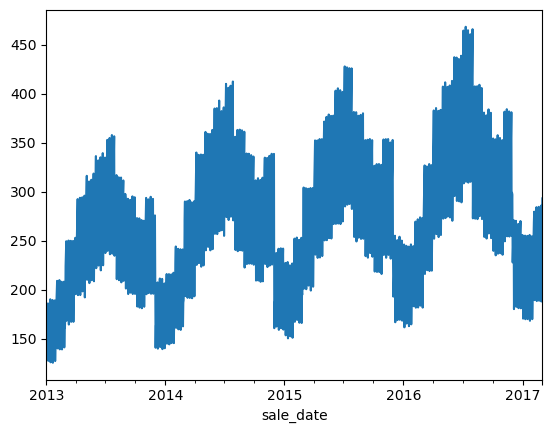

In [9]:
train.resample('D').sales_total.mean().plot()

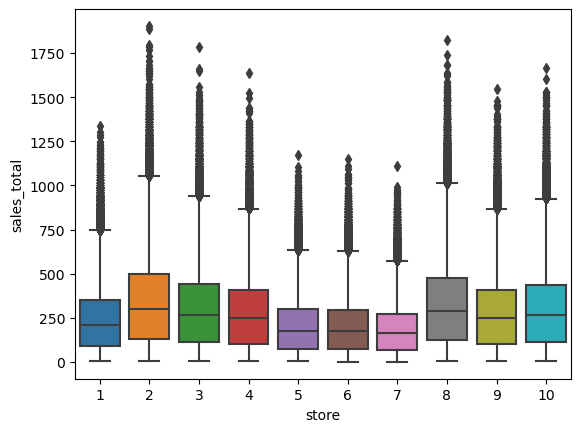

In [20]:
sns.boxplot(data=train.reset_index(),x='store',y='sales_total')
plt.show()

In [11]:
food=[1,3,4,5,8,9,10,17,20,22,23,27,28,29,30,36,37,39,40,41,42,43,45,46,47]
beauty=[2,6,13,15,16,19,48]
drink=[7,11,25,31,32,50]
medical=[12,14,21,26,33,34,35,38]
household=[18,24,44,49]

In [12]:
train['item_type']='food'
train.loc[train.item.isin(beauty),'item_type']='beauty'
train.loc[train.item.isin(drink),'item_type']='drink'
train.loc[train.item.isin(medical),'item_type']='medical'
train.loc[train.item.isin(household),'item_type']='household'

/var/folders/ml/8_q6055n29vf0c36kmj6w1900000gn/T/ipykernel_8326/3306669576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['item_type']='food'


In [13]:
train

,item,sale_amount,sale_id,store,item_brand,item_name,item_price,month,month_name,day_of_week,sales_total,item_type
sale_date,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,1,January,Tuesday,10.92,food
2013-01-01,17,26.0,295813,3,Ducal,Ducal Refried Red Beans,1.16,1,January,Tuesday,30.16,food
2013-01-01,7,32.0,125995,10,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,1,January,Tuesday,308.48,drink
2013-01-01,18,45.0,314073,3,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,1,January,Tuesday,197.55,household
2013-01-01,19,34.0,332333,3,Careone,Careone Family Comb Set - 8 Ct,0.74,1,January,Tuesday,25.16,beauty
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-02,37,34.0,675316,10,Nakano,Nakano Seasoned Rice Vinegar Original,9.59,3,March,Thursday,326.06,food
2017-03-02,39,33.0,700880,4,Munchies,Munchies Sandwich Crackers Cheddar Cheese On G...,9.02,3,March,Thursday,297.66,food
2017-03-02,47,12.0,852438,7,Bear Naked,Bear Naked Fit Almond Crisp 100 Percent Natura...,7.38,3,March,Thursday,88.56,food


In [103]:
train.item_type.value_counts()

food         380407
medical      121739
beauty       106521
drink         91302
household     60865
Name: item_type, dtype: int64

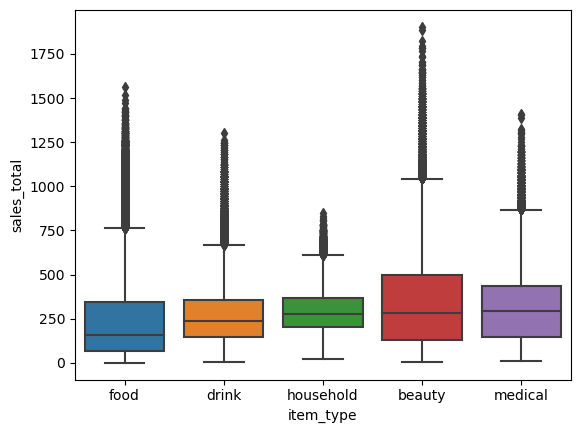

In [107]:
sns.boxplot(data=train.reset_index(),x='item_type',y='sales_total')
plt.show()

/var/folders/ml/8_q6055n29vf0c36kmj6w1900000gn/T/ipykernel_8326/2243331620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y(t+1)'] = train.sales_total.shift(-1)


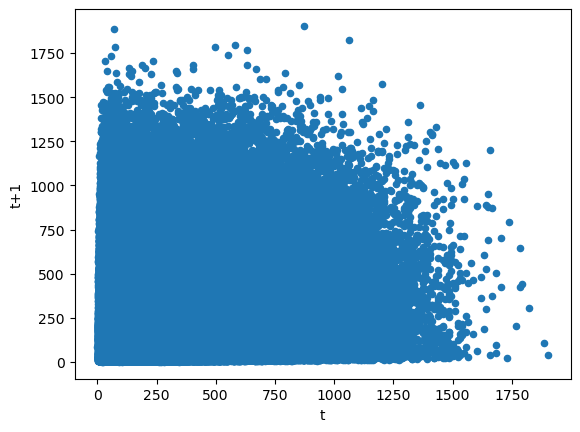

In [21]:
train['y(t+1)'] = train.sales_total.shift(-1)
train.plot.scatter(x='sales_total',y='y(t+1)').set(xlabel='t',ylabel='t+1')
plt.show()

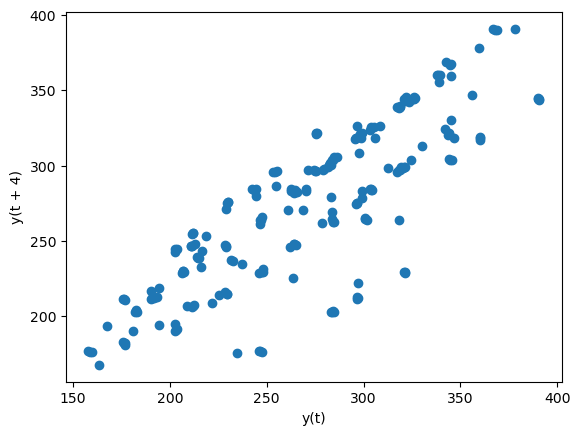

In [31]:
pd.plotting.lag_plot(train.resample('w').sales_total.mean(),lag=4)
plt.show()

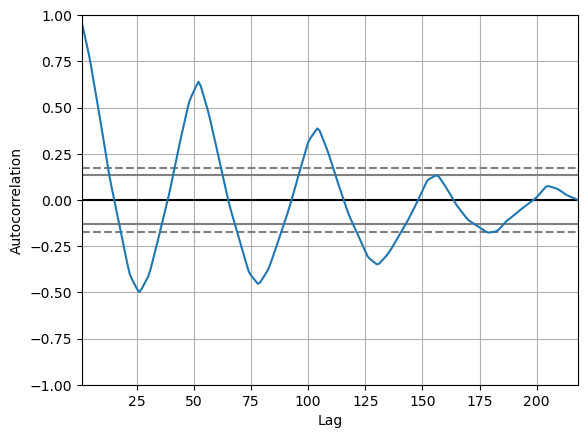

In [23]:
pd.plotting.autocorrelation_plot(train.resample('W').sales_total.mean())
plt.show()

In [32]:
y=train.sales_total.resample('W').mean()
result = sm.tsa.seasonal_decompose(y)

In [34]:
decomposition = pd.DataFrame({
    'y':result.observed,
    'trend':result.trend,
    'seasonal':result.seasonal,
    'resid':result.resid
})

<AxesSubplot:xlabel='sale_date'>

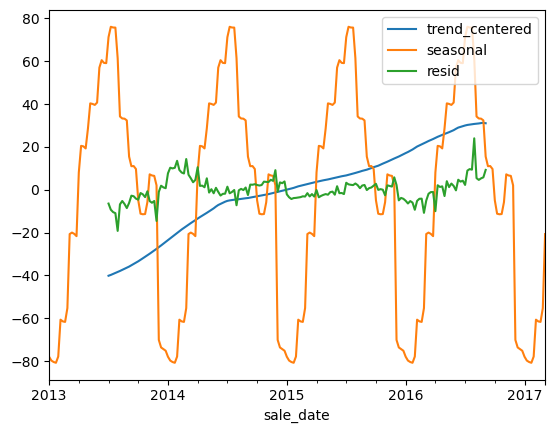

In [35]:
decomposition['trend_centered']=decomposition.trend-decomposition.trend.mean()
decomposition[['trend_centered','seasonal','resid']].plot()

## German Power data

In [38]:
op = get_german_power()
op = p.prep_german_power(op)
op

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,January,2006
2006-01-02,1380.52100,0.000,0.000,0.000,January,2006
2006-01-03,1442.53300,0.000,0.000,0.000,January,2006
2006-01-04,1457.21700,0.000,0.000,0.000,January,2006
2006-01-05,1477.13100,0.000,0.000,0.000,January,2006
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017


In [39]:
op.reset_index().describe(datetime_is_numeric=True)

,Date,Consumption,Wind,Solar,Wind+Solar,year
count,4383,4383.000000,4383.000000,4383.000000,4383.000000,4383.000000
mean,2012-01-01 00:00:00,1338.675836,109.922818,44.642921,154.565740,2011.500342
min,2006-01-01 00:00:00,842.395000,0.000000,0.000000,0.000000,2006.000000
25%,2008-12-31 12:00:00,1217.859000,0.000000,0.000000,0.000000,2008.500000
50%,2012-01-01 00:00:00,1367.123000,62.373000,1.968000,123.987000,2012.000000
75%,2014-12-31 12:00:00,1457.761000,162.434000,86.407000,248.394000,2014.500000
max,2017-12-31 00:00:00,1709.568000,826.278000,241.580000,851.556000,2017.000000
std,NaN,165.775710,140.757103,60.862336,165.181768,3.452347


In [40]:
for tr_idx,t_idx in tss.split(op):
    tr,t = op.iloc[tr_idx],op.iloc[t_idx]
tr.reset_index().describe(datetime_is_numeric=True)

,Date,Consumption,Wind,Solar,Wind+Solar,year
count,3653,3653.000000,3653.00000,3653.000000,3653.000000,3653.000000
mean,2011-01-01 00:00:00,1329.814626,82.73294,34.284977,117.017917,2010.501232
min,2006-01-01 00:00:00,842.395000,0.00000,0.000000,0.000000,2006.000000
25%,2008-07-02 00:00:00,1209.763000,0.00000,0.000000,0.000000,2008.000000
50%,2011-01-01 00:00:00,1359.065000,39.58100,0.000000,67.055000,2011.000000
75%,2013-07-02 00:00:00,1451.449000,123.22600,55.380000,205.579000,2013.000000
max,2016-01-01 00:00:00,1709.568000,696.63700,218.299000,731.845000,2016.000000
std,NaN,165.163963,113.80932,54.830401,137.276374,2.873341


<AxesSubplot:xlabel='Date'>

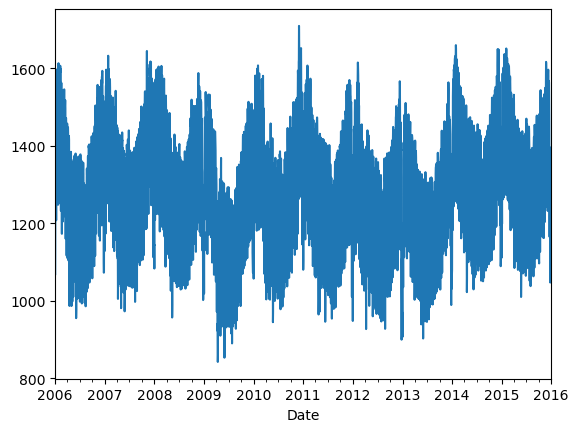

In [41]:
tr.Consumption.plot()

<AxesSubplot:xlabel='Date'>

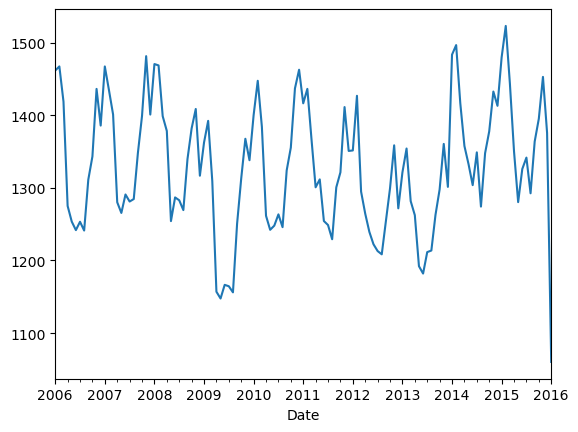

In [42]:
tr.resample('M').Consumption.mean().plot()

<AxesSubplot:xlabel='Date'>

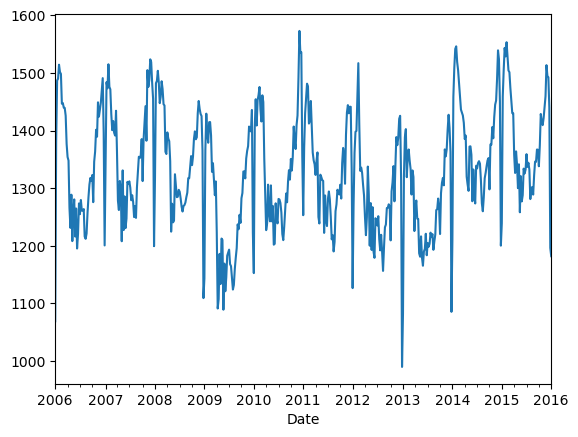

In [43]:
tr.resample('W').Consumption.mean().plot()

<AxesSubplot:xlabel='Date'>

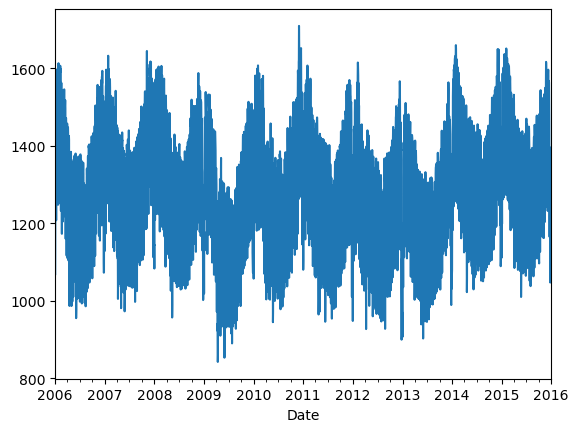

In [44]:
tr.resample('D').Consumption.mean().plot()

In [45]:
tr

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.000,0.000,0.000,January,2006
2006-01-02,1380.521,0.000,0.000,0.000,January,2006
2006-01-03,1442.533,0.000,0.000,0.000,January,2006
2006-01-04,1457.217,0.000,0.000,0.000,January,2006
2006-01-05,1477.131,0.000,0.000,0.000,January,2006
...,...,...,...,...,...,...
2015-12-28,1219.075,206.191,41.696,247.887,December,2015
2015-12-29,1233.660,305.635,32.625,338.260,December,2015
2015-12-30,1238.863,365.176,27.270,392.446,December,2015


<AxesSubplot:xlabel='Date'>

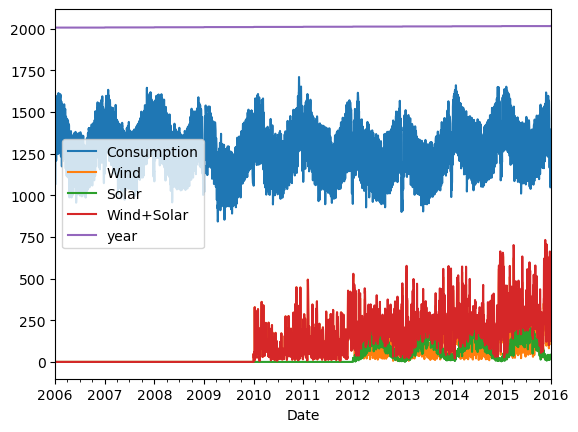

In [46]:
tr.plot()

<AxesSubplot:xlabel='Date'>

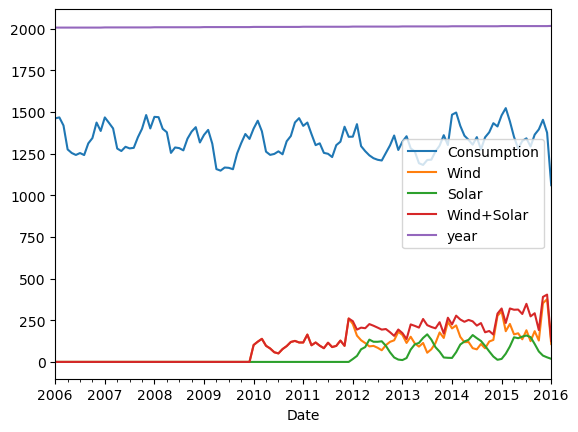

In [47]:
tr.resample('M').mean().plot()

<AxesSubplot:xlabel='Date'>

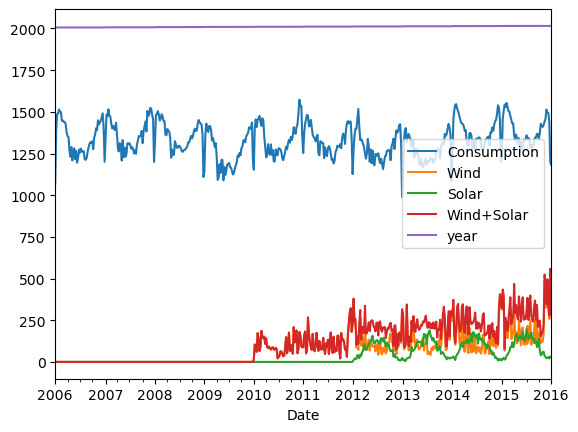

In [48]:
tr.resample('W').mean().plot()

<AxesSubplot:xlabel='Date'>

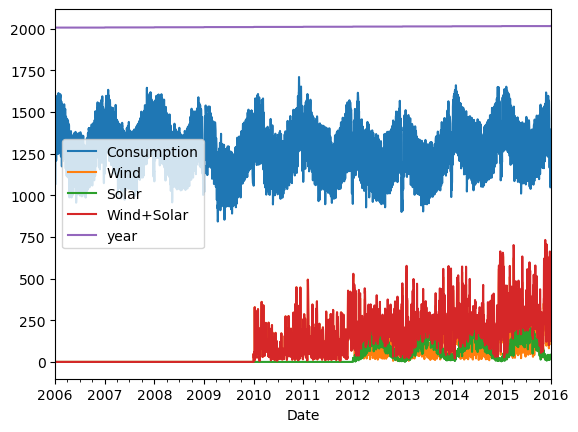

In [49]:
tr.resample('D').mean().plot()

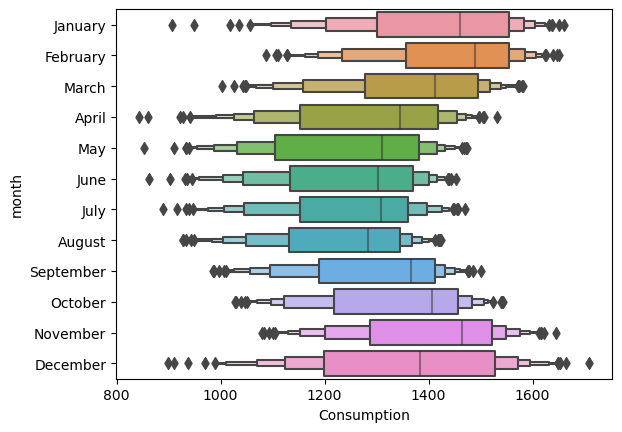

In [52]:
sns.boxenplot(data=tr.reset_index(),y='month',x='Consumption')
plt.show()

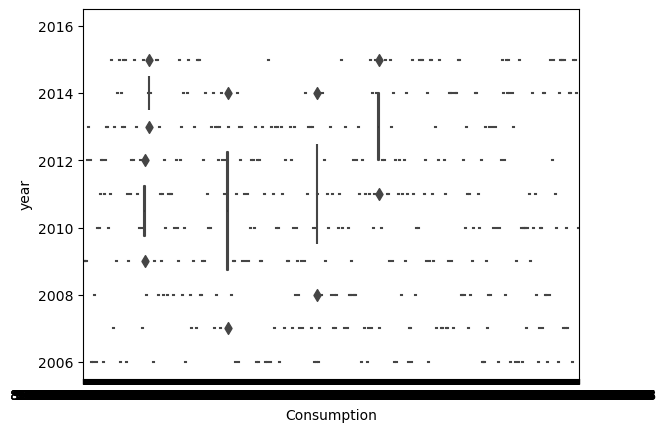

In [53]:
sns.boxenplot(data=tr.reset_index(),y='year',x='Consumption')
plt.show()

/var/folders/ml/8_q6055n29vf0c36kmj6w1900000gn/T/ipykernel_8326/4171860241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr['y(t+1)'] = tr.Consumption.shift(-1)


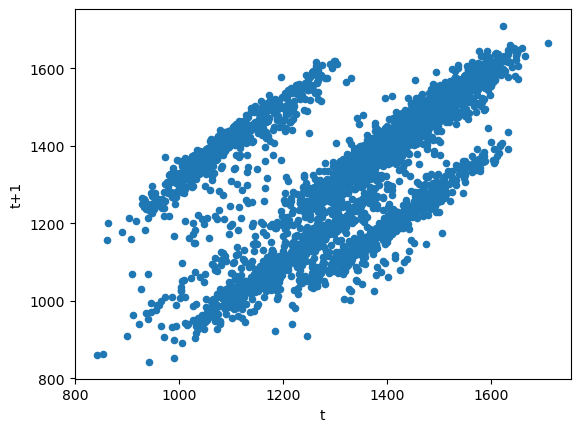

In [55]:
tr['y(t+1)'] = tr.Consumption.shift(-1)
tr.plot.scatter(x='Consumption',y='y(t+1)').set(xlabel='t',ylabel='t+1')
plt.show()

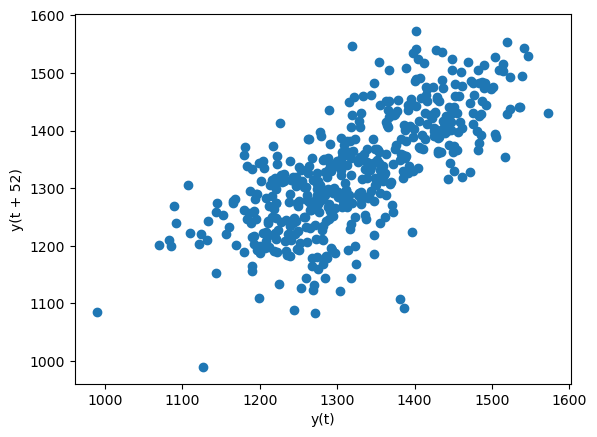

In [62]:
pd.plotting.lag_plot(tr.resample('W').Consumption.mean(),lag=52)
plt.show()

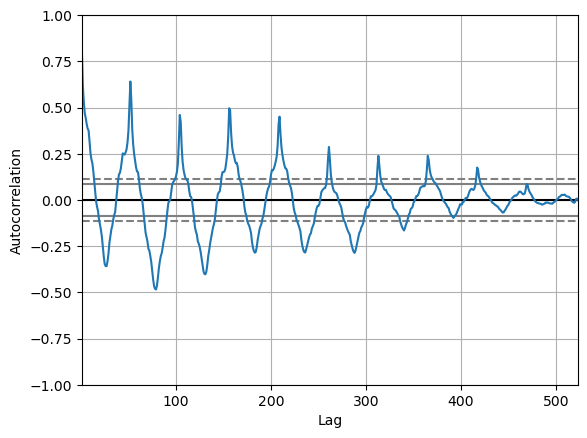

In [60]:
pd.plotting.autocorrelation_plot(tr.resample('W').Consumption.mean())
plt.show()

In [63]:
y=tr.Consumption.resample('W').mean()
result = sm.tsa.seasonal_decompose(y)

In [64]:
decomposition = pd.DataFrame({
    'y':result.observed,
    'trend':result.trend,
    'seasonal':result.seasonal,
    'resid':result.resid
})

<AxesSubplot:xlabel='Date'>

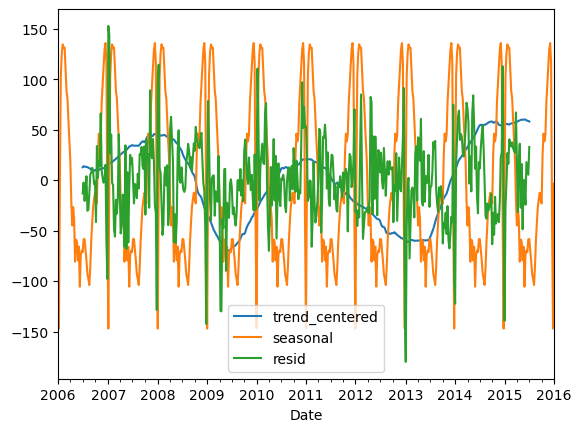

In [65]:
decomposition['trend_centered']=decomposition.trend-decomposition.trend.mean()
decomposition[['trend_centered','seasonal','resid']].plot()

In [66]:
tr

,Consumption,Wind,Solar,Wind+Solar,month,year,y(t+1)
Date,,,,,,,
2006-01-01,1069.184,0.000,0.000,0.000,January,2006,1380.521
2006-01-02,1380.521,0.000,0.000,0.000,January,2006,1442.533
2006-01-03,1442.533,0.000,0.000,0.000,January,2006,1457.217
2006-01-04,1457.217,0.000,0.000,0.000,January,2006,1477.131
2006-01-05,1477.131,0.000,0.000,0.000,January,2006,1403.427
...,...,...,...,...,...,...,...
2015-12-28,1219.075,206.191,41.696,247.887,December,2015,1233.660
2015-12-29,1233.660,305.635,32.625,338.260,December,2015,1238.863
2015-12-30,1238.863,365.176,27.270,392.446,December,2015,1158.103


In [87]:
op = op[op.Wind>0]
op

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2010-01-01,1057.37200,48.709,0.000,48.709,January,2010
2010-01-02,1161.04200,24.628,0.000,24.628,January,2010
2010-01-03,1132.06900,22.963,0.000,22.963,January,2010
2010-01-04,1346.25000,59.318,0.000,59.318,January,2010
2010-01-05,1457.37400,41.624,0.000,41.624,January,2010
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,December,2017
2017-12-28,1299.86398,506.424,14.162,520.586,December,2017
2017-12-29,1295.08753,584.277,29.854,614.131,December,2017


In [88]:
for tr_idx,t_idx in tss.split(op):
    tr,t=op.iloc[tr_idx],op.iloc[t_idx]
tr.reset_index().describe(datetime_is_numeric=True)

,Date,Consumption,Wind,Solar,Wind+Solar,year
count,2435,2435.000000,2435.000000,2435.000000,2435.000000,2435.000000
mean,2013-05-02 00:00:00,1334.804459,144.553701,62.606952,207.160653,2012.850513
min,2010-01-01 00:00:00,899.827000,5.757000,0.000000,5.757000,2010.000000
25%,2011-09-01 12:00:00,1209.863000,57.062000,0.000000,109.715500,2011.000000
50%,2013-05-02 00:00:00,1364.661000,107.629000,41.298000,192.534000,2013.000000
75%,2014-12-31 12:00:00,1450.972000,195.591000,116.349500,272.965000,2014.500000
max,2016-08-31 00:00:00,1709.568000,751.656000,229.714000,783.936000,2016.000000
std,NaN,164.924709,122.688793,63.017749,132.724972,1.931190


<AxesSubplot:xlabel='Date'>

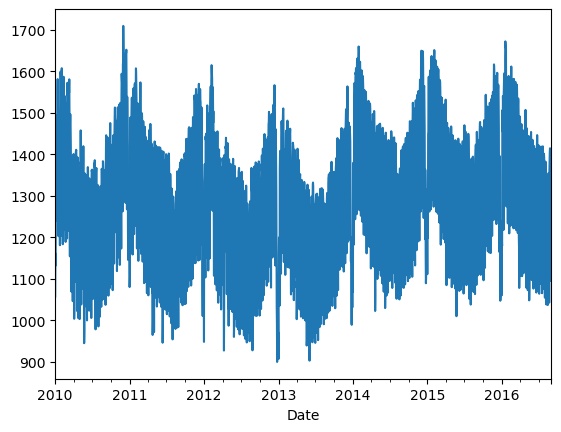

In [89]:
tr.Consumption.plot()

<AxesSubplot:xlabel='Date'>

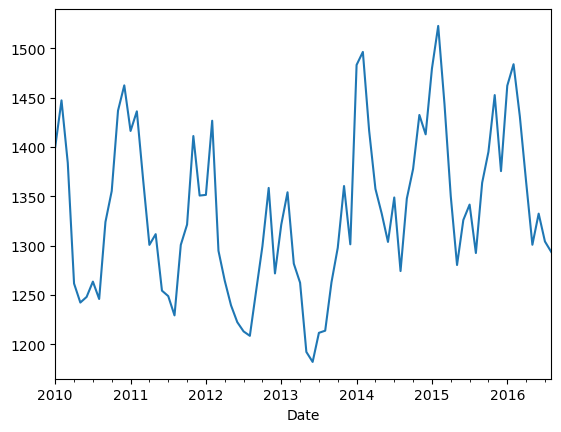

In [90]:
tr.resample('M').Consumption.mean().plot()

<AxesSubplot:xlabel='Date'>

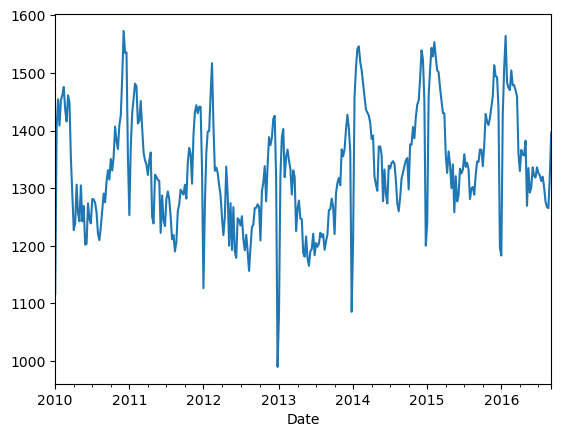

In [91]:
tr.resample('W').Consumption.mean().plot()

<AxesSubplot:xlabel='Date'>

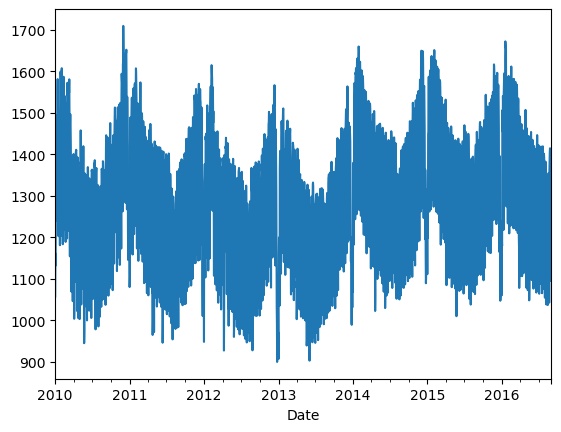

In [92]:
tr.resample('D').Consumption.mean().plot()

<AxesSubplot:xlabel='Date'>

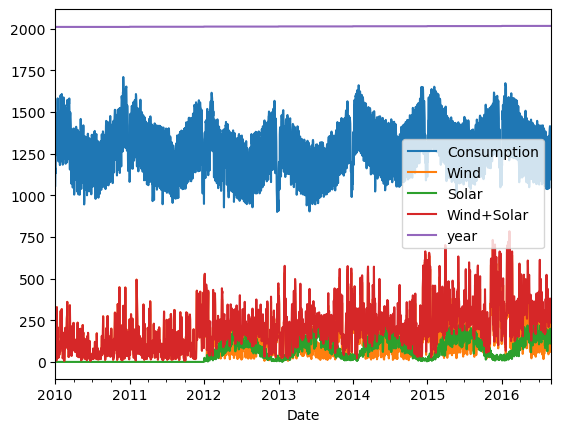

In [93]:
tr.plot()

<AxesSubplot:xlabel='Date'>

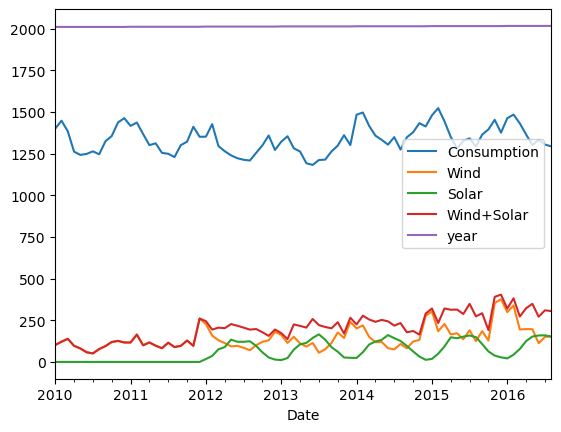

In [94]:
tr.resample('M').mean().plot()

<AxesSubplot:xlabel='Date'>

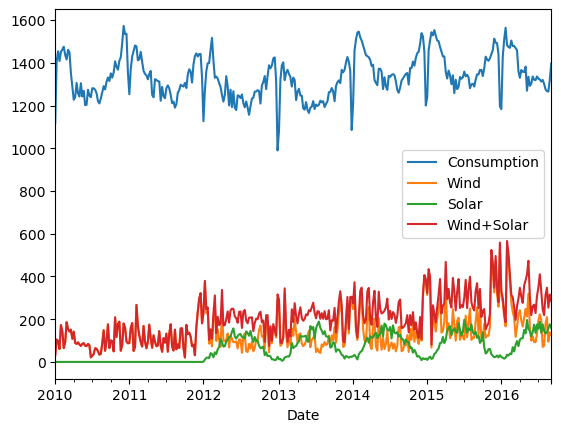

In [95]:
tr.drop(columns='year').resample('W').mean().plot()

<AxesSubplot:xlabel='Date'>

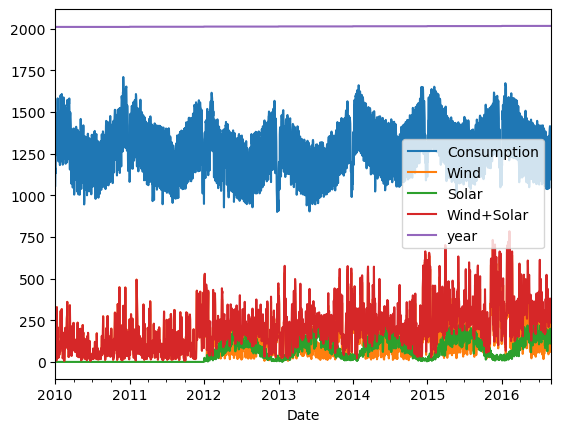

In [96]:
tr.resample('D').mean().plot()

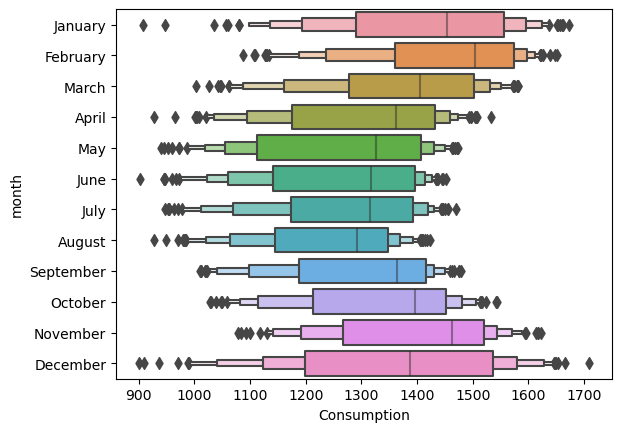

In [97]:
sns.boxenplot(data=tr.reset_index(),y='month',x='Consumption')
plt.show()

/var/folders/ml/8_q6055n29vf0c36kmj6w1900000gn/T/ipykernel_8326/4171860241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tr['y(t+1)'] = tr.Consumption.shift(-1)


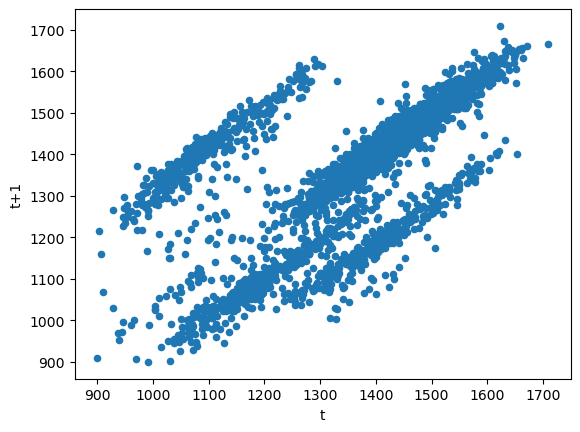

In [98]:
tr['y(t+1)'] = tr.Consumption.shift(-1)
tr.plot.scatter(x='Consumption',y='y(t+1)').set(xlabel='t',ylabel='t+1')
plt.show()

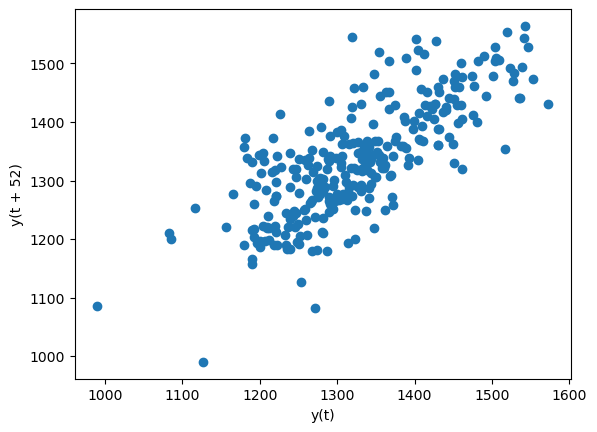

In [99]:
pd.plotting.lag_plot(tr.resample('W').Consumption.mean(),lag=52)
plt.show()

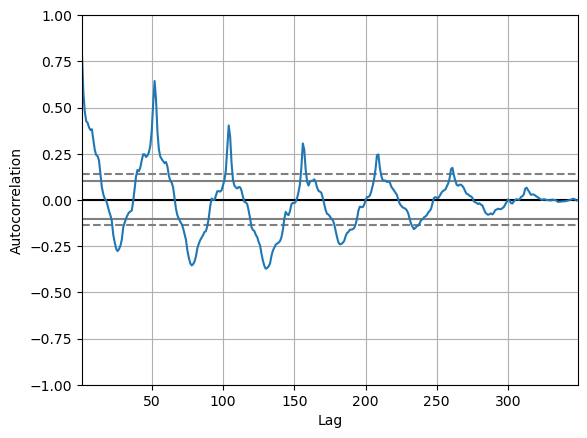

In [100]:
pd.plotting.autocorrelation_plot(tr.resample('W').Consumption.mean())
plt.show()

<AxesSubplot:xlabel='Date'>

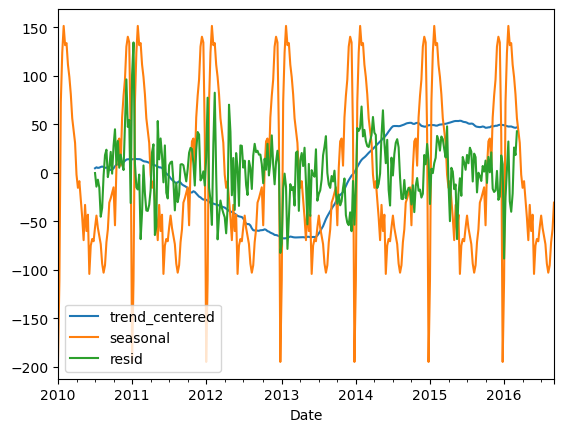

In [101]:
y=tr.Consumption.resample('W').mean()
result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y':result.observed,
    'trend':result.trend,
    'seasonal':result.seasonal,
    'resid':result.resid
})
decomposition['trend_centered']=decomposition.trend-decomposition.trend.mean()
decomposition[['trend_centered','seasonal','resid']].plot()